<a href="https://colab.research.google.com/github/MrDataProf/Pandas-Analytics-Project/blob/main/CNN_with_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.images, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Preprocess the data for CNN
X_train = X_train[..., tf.newaxis].astype("float32") / 16.0
X_test = X_test[..., tf.newaxis].astype("float32") / 16.0

# Create a Convolutional Neural Network (CNN)
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(8, 8, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])



In [ ]:
# Compile the model
model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model_cnn.fit(X_train, y_train, epochs=10, validation_split=0.2)




Epoch 1/10
36/36 [==============================] - 2s 24ms/step - loss: 2.1453 - accuracy: 0.3299 - val_loss: 1.9716 - val_accuracy: 0.4062
Epoch 2/10
36/36 [==============================] - 0s 12ms/step - loss: 1.6542 - accuracy: 0.7250 - val_loss: 1.3391 - val_accuracy: 0.7882
Epoch 3/10
36/36 [==============================] - 0s 12ms/step - loss: 1.0007 - accuracy: 0.8486 - val_loss: 0.7775 - val_accuracy: 0.8090
Epoch 4/10
36/36 [==============================] - 0s 9ms/step - loss: 0.5877 - accuracy: 0.8999 - val_loss: 0.4977 - val_accuracy: 0.9028
Epoch 5/10
36/36 [==============================] - 0s 8ms/step - loss: 0.3911 - accuracy: 0.9269 - val_loss: 0.3638 - val_accuracy: 0.9097
Epoch 6/10
36/36 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.9452 - val_loss: 0.3106 - val_accuracy: 0.9236
Epoch 7/10
36/36 [==============================] - 0s 11ms/step - loss: 0.2325 - accuracy: 0.9574 - val_loss: 0.2649 - val_accuracy: 0.9410
Epoch 8/10
36/36

In [ ]:
# Evaluate the model
y_pred_cnn_prob = model_cnn.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))
conf_mat_cnn = confusion_matrix(y_test, y_pred_cnn)


12/12 [==============================] - 0s 3ms/step
CNN Accuracy: 0.9611111111111111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.82      0.90        28
           2       0.92      1.00      0.96        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      0.97      0.95        30
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



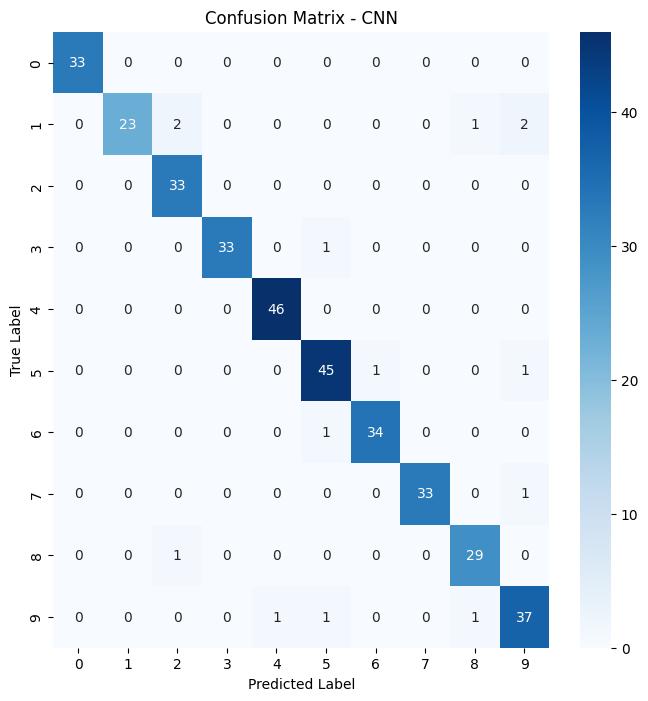

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Interpretation:
**Evaluation:**
The evaluation metrics for the Convolutional Neural Network (CNN) on your task also show excellent results. Let's break down the interpretation:

**Accuracy:**
The accuracy score of 0.9611 (or 96.11%) indicates that the CNN correctly predicted the target values for approximately 96.11% of the samples in the test set.

**Classification Report:**
The classification report provides detailed metrics for each class:

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this case, precision values range from 0.90 to 1.00, indicating high precision for most classes.

**Recall (Sensitivity or True Positive Rate):** Recall is the ratio of correctly predicted positive observations to the total actual positives. Recall values range from 0.82 to 1.00, demonstrating high recall for most classes.

**F1-Score:** The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For most classes, the F1-score is close to 1.00, indicating a good balance between precision and recall.

**Support:** Support is the number of actual occurrences of the class in the specified dataset.

**Macro Avg and Weighted Avg:**
**Macro Avg:** The average of precision, recall, and F1-score across all classes. The macro average in this case is 0.96, which is excellent.

**Weighted Avg:** The weighted average of precision, recall, and F1-score, considering the support for each class. The weighted average in this case is 0.96, indicating a well-balanced performance across different classes.

**Summary:**
The CNN also performs exceptionally well on your task, achieving high accuracy and demonstrating robust precision and recall values for each class. This suggests that the model can effectively classify different classes in your dataset. Overall, both the ANN and CNN models show strong potential for the given classification task, and the choice between them may depend on factors such as model complexity and computational resources.





